# Atividade #06

#### Codificação de variáveis textuais

## Explicações

As palavras ou textos em geral são formatadas em dados não estruturados, isto é, não padronizados e aptos a serem imediatamente processados por uma máquina. Para a relização da análise desses textos, utilza-se o que se chama de _feature extraction_. 

_Feature extraction_ nada mais é do que a transformação de variáveis textuais, isto é, um palavra, letra ou texto em um número, apto ao processamento ou armazenato computacional. Isso possibilita a utilização em modelos de aprendizado de máquina.

### Bag-of-Words ou BoW

O modelo _bag-of-words_ ou _BoW_ é uma forma de representar o texto ou documento de acordo com a ocorrência de palavras nesse texto ou documento.

Trata-se de uma representação simplificada utilizada para processamento de linguagem natural e/ou recuperação de informações cujo texto ou documento é atribuído a um _"multiset"_ ou _"saco de suas palavras"_, mantendo-se a multiplicidade (quantidade de vezes) das palavras encontradas.

Vale dizer que o _BoW_ desconsidera a gramática e/ou a ordem das palavras.

De forma resumida, possui 03 (três) etapas: (i) **Seleção dos dados**; (ii) **Geração de vocabulário**; (iii) **Formação de vetores obtidos de um documento**.

### Term Frequency Inverse Document Frequency ou TD-IDF

O modelo _Term Frequency Inverse Document Frequency_ ou _TF-IDF_ é um conjunto de medidas estatísticas utilizado para verificar a relevância de uma palavra em um documento ou texto e, por meio de uma pontuação, classificar essa relevância. 

Esse TF-IDF de uma palavra em um texto ou documento é obtido multiplicando duas métricas diferentes:
   (i) **Term Frequency - TD** (a frequência do termo): mensura a frequência com que um termo ocorre num documento;
   (ii) **Inverse Document Frequency - IDF** (inverso da frequência nos documentos): mensura a relevância de um termo no contexto de todos os documentos.

## Prática

In [1]:
# Importando bibliotecas

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregando dados

frases = [
    "John likes",
    "likes to",
    "to watch",
    "watch movies",
    "Mary likes",
    "likes movies",
    "movies too",
]

print(frases)

['John likes', 'likes to', 'to watch', 'watch movies', 'Mary likes', 'likes movies', 'movies too']


In [3]:
# Padronizando dados

lista_frases = []

for i in frases:
    lista_frases.append(i.lower())

print(lista_frases)

['john likes', 'likes to', 'to watch', 'watch movies', 'mary likes', 'likes movies', 'movies too']


### Bag of Words

In [4]:
# Aplicando BoW

vetorBow = CountVectorizer()

resultado = vetorBow.fit_transform(lista_frases)

#Imprimindo resultado na forma de matrix

print(resultado.toarray())

# Dicionário para contagem de frequência dos dados

dicionario = vetorBow.vocabulary_

# Imprimindo dicionário com palavras

print( f"Dicionário:{dicionario}")


[[1 1 0 0 0 0 0]
 [0 1 0 0 1 0 0]
 [0 0 0 0 1 0 1]
 [0 0 0 1 0 0 1]
 [0 1 1 0 0 0 0]
 [0 1 0 1 0 0 0]
 [0 0 0 1 0 1 0]]
Dicionário:{'john': 0, 'likes': 1, 'to': 4, 'watch': 6, 'movies': 3, 'mary': 2, 'too': 5}


In [5]:
# Ordenando Dicionário

dicionario = {k: v for k, v in sorted(dicionario.items(), key=lambda item: item[1], reverse = True)}

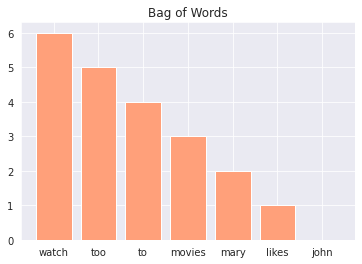

In [6]:
# Criando gráfico Bow

sns.set_style("darkgrid")
plt.title('Bag of Words')
plt.bar(dicionario.keys(), dicionario.values(), color = "lightsalmon")
plt.show()

### TF-IDF

In [7]:
# Aplicando TF-IDF

vetorTf = TfidfVectorizer()

vetorTf.fit_transform(lista_frases)

# Frequência

frequencia = vetorTf.vocabulary_

# Pontuação

score = vetorTf.idf_

c = 0
dicionario_score = {}
for key in frequencia.keys():
    dicionario_score [key] = score[c]
    c += 1

# Imprimindo pontuação

print( f"Pontuação:{dicionario_score}")


Pontuação:{'john': 2.386294361119891, 'likes': 1.4700036292457357, 'to': 2.386294361119891, 'watch': 1.6931471805599454, 'movies': 1.9808292530117262, 'mary': 2.386294361119891, 'too': 1.9808292530117262}


In [8]:
# Ordenando Pontuação

dicionario_score = {k: v for k, v in sorted(dicionario_score.items(), key=lambda item: item[1], reverse = True)}

/tmp/ipykernel_712/570029868.py:6: UserWarning: Trying to create polar plot on an Axes that does not have a polar projection.
  plt.polar(dicionario_score.keys(), dicionario_score.values(), color = "grey")


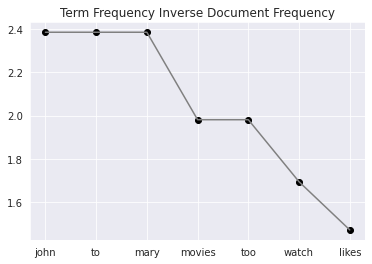

In [9]:
# Criando gráfico TF-IDF

sns.set_style("darkgrid")
plt.title('Term Frequency Inverse Document Frequency')
plt.scatter(dicionario_score.keys(), dicionario_score.values(), color = "black")
plt.polar(dicionario_score.keys(), dicionario_score.values(), color = "grey")
plt.show()